# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.36 which is incompatible.
jupyter-console 6.4.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 5.2.4 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)




Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

In [5]:
from dqn_agent_final import Agent
from collections import namedtuple, deque
import torch

print("Start")
agent = Agent(state_size=37, action_size=4, seed=0, fc1_units=256, fc2_units=256)
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state

n_episodes = 2500
eps_start = 1.0
eps_decay=0.995
eps = eps_start                    # initialize epsilon
eps_end = 0.01
# score = 0                                          # initialize the score
step = 0
scores = []                        # list containing scores from each episode
scores_window = deque(maxlen=100)  # last 100 scores
average_scores = []
max_score = 0.0
scores_all = []

for i_episode in range(1, n_episodes+1):
    env.reset()
    score = 0
    step_counter = 0
    while True: #step_counter < 800:
        action = agent.act(state, eps)
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        agent.step(state, action, reward, next_state, done)
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        step +=1
        step_counter+=1
        if done:                                       # exit loop if episode finished
            break
    scores_all.append(score)
    scores_window.append(score)
    eps = max(eps_end, eps_decay*eps) # decrease epsilon
    average_scores.append(np.mean(scores_window))
    if i_episode % 50 == 0:
#         print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        print(f"Episode {i_episode}, Average Score: {np.mean(scores_window)}")
    if max(average_scores)>=13.0 and max_score < max(average_scores):
        max_score = max(average_scores)
#         print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
#         break

print(f"End. Best average score: {max(average_scores)}")

Start
Episode 50, Average Score: -0.06
Episode 100, Average Score: 0.69
Episode 150, Average Score: 2.54
Episode 200, Average Score: 4.25
Episode 250, Average Score: 5.67
Episode 300, Average Score: 6.8
Episode 350, Average Score: 7.84
Episode 400, Average Score: 9.57
Episode 450, Average Score: 11.0
Episode 500, Average Score: 11.86
Episode 550, Average Score: 12.5
Episode 600, Average Score: 12.76
Episode 650, Average Score: 13.11
Episode 700, Average Score: 13.85
Episode 750, Average Score: 13.97
Episode 800, Average Score: 13.57
Episode 850, Average Score: 13.68
Episode 900, Average Score: 13.27
Episode 950, Average Score: 13.53
Episode 1000, Average Score: 14.0
Episode 1050, Average Score: 13.8
Episode 1100, Average Score: 14.32
Episode 1150, Average Score: 14.41
Episode 1200, Average Score: 14.13
Episode 1250, Average Score: 14.1
Episode 1300, Average Score: 14.95
Episode 1350, Average Score: 15.51
Episode 1400, Average Score: 15.09
Episode 1450, Average Score: 14.78
Episode 1500

In [6]:
# average_scores_1 = average_scores.copy()

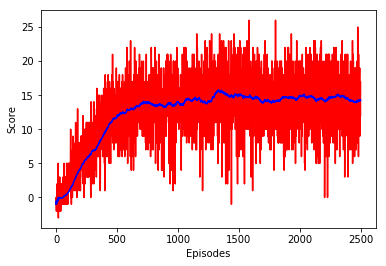

In [10]:
import matplotlib.pyplot as plt
plt.ion()
plt.plot(scores_all, c='r')
plt.plot(average_scores, c='b')
plt.ylabel("Score")
plt.xlabel("Episodes")
plt.show()

In [11]:
env.close()